In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('Exploratory_data_analysis.pkl')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


### Creating new features

In [5]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data['JobSatisfaction_JobInvolvement'] = data['EmpJobSatisfaction'] * data['EmpJobInvolvement']


In [7]:
data['Experience_Salary'] = data['TotalWorkExperienceInYears'] * data['EmpHourlyRate']


In [8]:
data['Performance_WorkLifeBalance'] = data['PerformanceRating'] * data['EmpWorkLifeBalance']


In [9]:
correlation_value = data['JobSatisfaction_JobInvolvement'].corr(data['PerformanceRating'])
correlation_value

-0.008997603082088286

In [10]:
correlation_value = data['Experience_Salary'].corr(data['PerformanceRating'])
correlation_value

-0.09312732868808027

In [11]:
correlation_value = data['Performance_WorkLifeBalance'].corr(data['PerformanceRating'])
correlation_value

0.6381389130312791

In [12]:
# 'JobSatisfaction_JobInvolvement' and 'Experience_Salary' are least correlated with 'PerformanceRating' so we will not consider them.

In [13]:
data = data.drop(['JobSatisfaction_JobInvolvement','Experience_Salary'], axis =1)

In [14]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Performance_WorkLifeBalance
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3,6
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3,9
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4,12
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3,6
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4,12
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3,9
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3,9
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3,12


### Encoding 

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode binary or ordinal columns
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])


In [16]:
# Use pandas get_dummies for one-hot encoding
data = pd.get_dummies(data, columns = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency'],dtype=int)



In [17]:
data

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Performance_WorkLifeBalance,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EmpDepartment_Data Science,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Human Resources,EmpDepartment_Research & Development,EmpDepartment_Sales,EmpJobRole_Business Analyst,EmpJobRole_Data Scientist,EmpJobRole_Delivery Manager,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Healthcare Representative,EmpJobRole_Human Resources,EmpJobRole_Laboratory Technician,EmpJobRole_Manager,EmpJobRole_Manager R&D,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,32,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3,6,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,47,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3,9,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,40,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4,12,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,41,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3,6,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3,9,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,1,20,2,6,3,3,6,5,0,4,0,4,12,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1196,37,10,2,4,80,4,1,4,3,0,17,1,4,2,3,1,0,0,0,0,3,9,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1197,50,28,1,4,74,4,1,3,1,1,11,3,20,3,3,20,8,3,8,0,3,9,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1198,34,9,3,4,46,2,3,2,1,0,14,2,9,3,4,8,7,7,7,0,3,12,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### feature selection

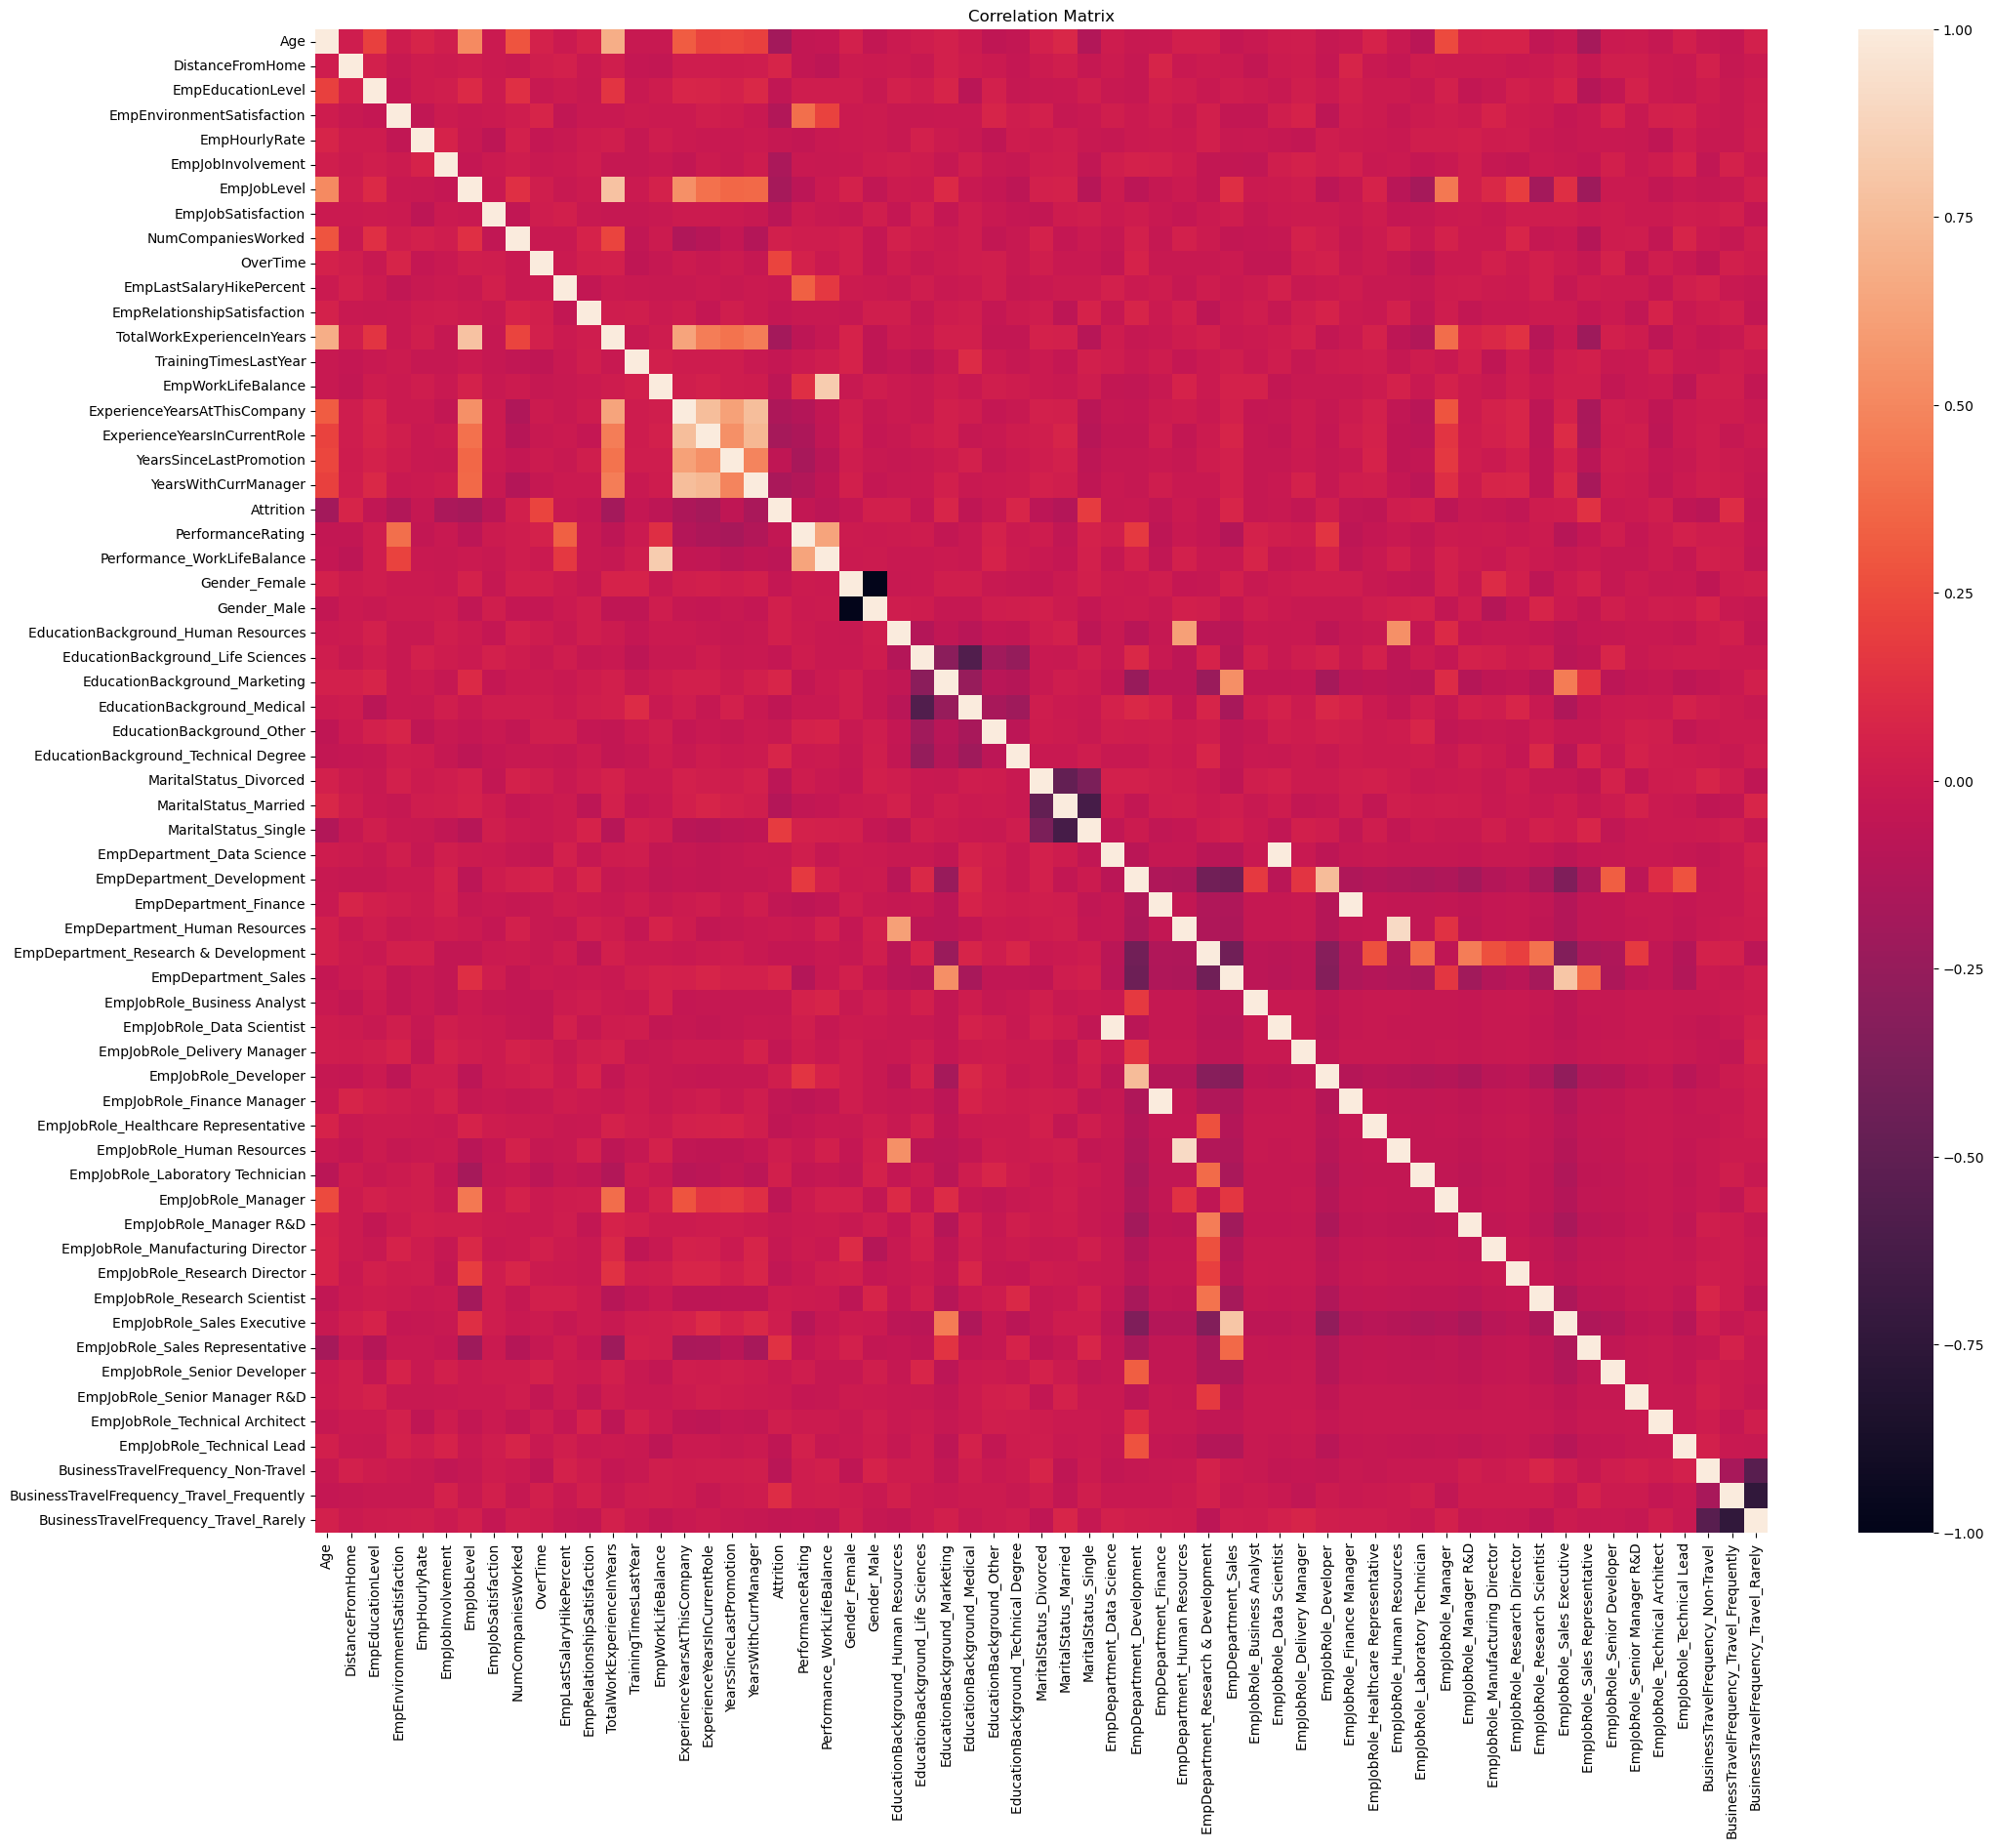

In [18]:
plt.figure(figsize=(24,20))
sns.heatmap(data.corr())
plt.title("Correlation Matrix")
plt.show()

In [19]:
data.to_pickle('feature_engineering_and_selection.pkl')

In [23]:
data.to_csv('processed_data_ohe.csv')

### Feature selection 

In [20]:
# Dropping columns which are least correlated with PerformanceRating

correlations = data.corr()['PerformanceRating']
columns_to_drop = correlations[correlations < 0].index.tolist()
data = data.drop(columns=columns_to_drop)

In [21]:
data

,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,PerformanceRating,Performance_WorkLifeBalance,Gender_Female,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Other,MaritalStatus_Divorced,MaritalStatus_Single,EmpDepartment_Data Science,EmpDepartment_Development,EmpJobRole_Business Analyst,EmpJobRole_Data Scientist,EmpJobRole_Delivery Manager,EmpJobRole_Developer,EmpJobRole_Manager,EmpJobRole_Manufacturing Director,EmpJobRole_Research Scientist,EmpJobRole_Senior Developer,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently
0,3,4,4,1,0,12,2,3,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,4,1,2,0,12,3,3,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,4,1,5,1,21,3,4,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2,4,3,0,15,2,3,6,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,1,1,8,0,14,3,3,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,4,4,1,1,20,3,4,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1196,2,4,4,3,0,17,3,3,9,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1197,1,4,3,1,1,11,3,3,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1198,3,4,2,1,0,14,4,3,12,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [22]:
data.to_pickle('feature_engineering_and_selection_train.pkl')

In [24]:
data.to_csv('processed_data_feature_selected.csv')